In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-growth-data-classification/plant_growth_data.csv


# **Import**

In [88]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [89]:
df = pd.read_csv('/kaggle/input/plant-growth-data-classification/plant_growth_data.csv')

**Variable Description**
>**Soil_Type: The type or composition of soil in which the plants are grown.**   
>**Sunlight_Hours: The duration or intensity of sunlight exposure received by the plants.**   
>**Water_Frequency: How often the plants are watered, indicating the watering schedule.**   
>**Fertilizer_Type: The type of fertilizer used for nourishing the plants.**   
>**Temperature: The ambient temperature conditions under which the plants are grown.**   
>**Humidity: The level of moisture or humidity in the environment surrounding the plants.**   
>**Growth_Milestone: Descriptions or markers indicating stages or significant events in the growth process of the plants.**   

In [90]:
df.shape

(193, 7)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [92]:
df.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


**Missing Value Check**

In [93]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

**Duplicated value check**

In [94]:
df.duplicated().sum()

0

# **2. Data Visualization**

In [95]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns

## **Histogram**

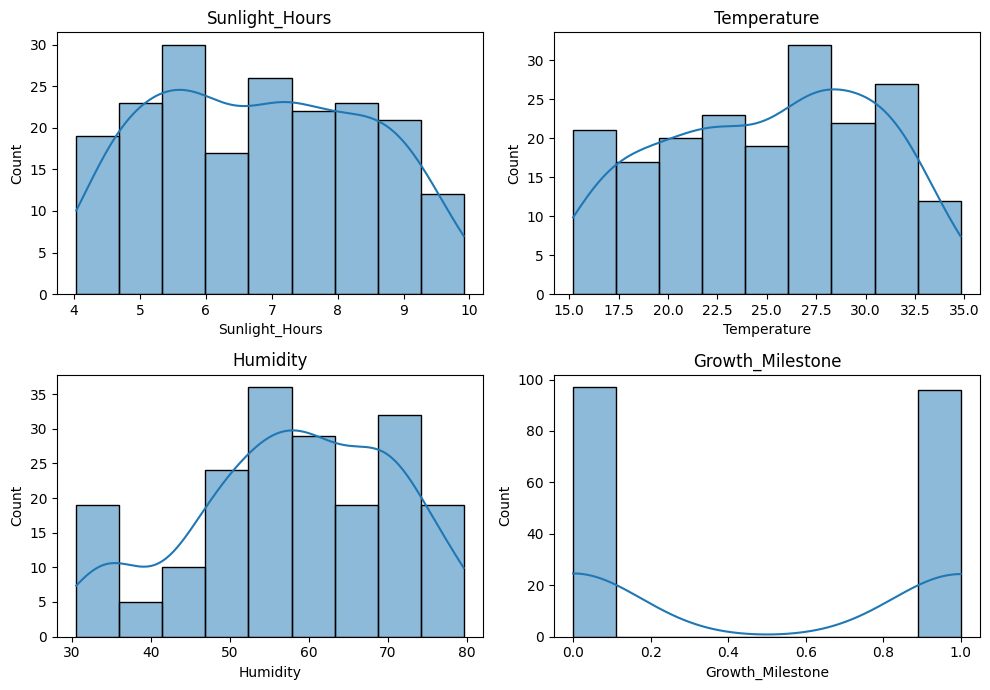

In [96]:
f, ax = plt.subplots(2,2 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Boxplot**

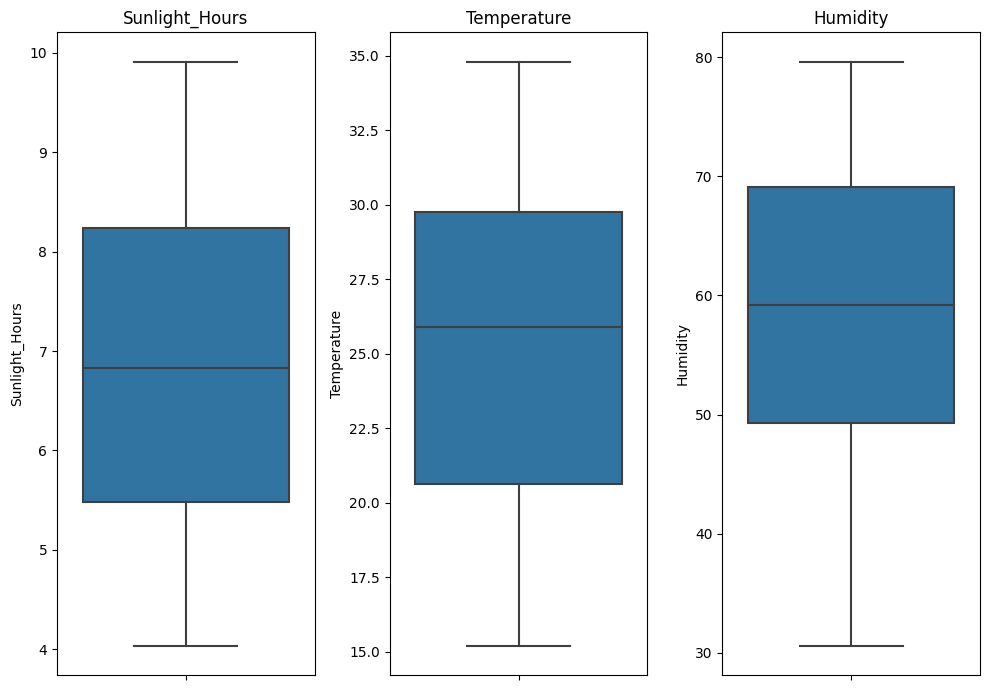

In [97]:
f, ax = plt.subplots(1,3 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols[0:3]):
    sns.boxplot(data= df, y= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **CountPlot**

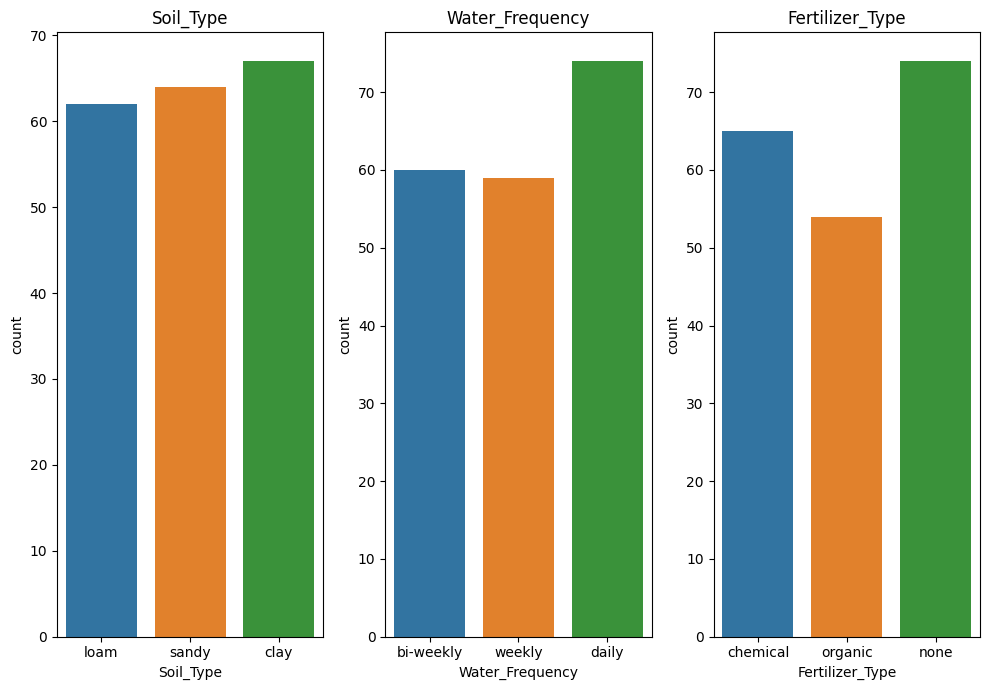

In [98]:
f, ax = plt.subplots(1,3 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Categorical Variables by Growth_Milestone**

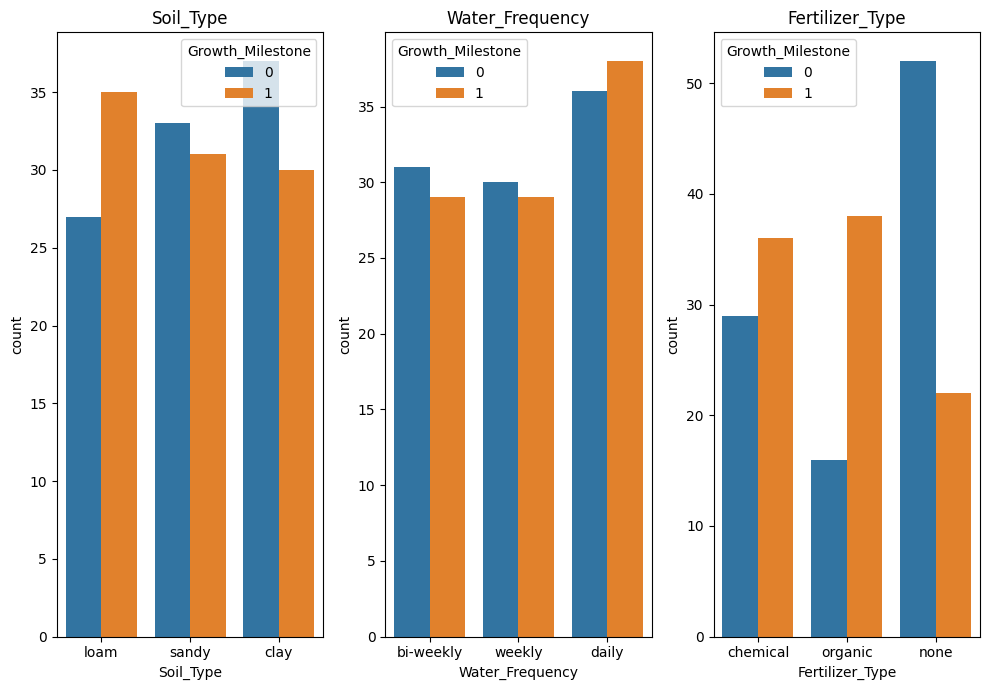

In [99]:
f, ax = plt.subplots(1,3 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(cat_cols[0:3]):
    sns.countplot(data= df, x= cols, ax = ax[index], hue = 'Growth_Milestone')
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Average Sunlight_Hours by Growth_Milestone**

In [100]:
avg_sunlight = df.groupby(['Growth_Milestone'])['Sunlight_Hours'].mean().reset_index()

In [101]:
avg_sunlight

,Growth_Milestone,Sunlight_Hours
0,0,7.020448
1,1,6.630500


In [102]:
px.bar(avg_sunlight, x= 'Growth_Milestone' , y = 'Sunlight_Hours', text_auto = True, title = 'Average Sunlight_Hours by Growth_Milestone', template='plotly')

## **Average Temperature by Growth_Milestone**

In [103]:
avg_temperature = df.groupby(['Growth_Milestone'])['Temperature'].mean().reset_index()

In [104]:
avg_temperature

,Growth_Milestone,Temperature
0,0,25.360722
1,1,24.788487


In [105]:
px.bar(avg_temperature, x= 'Growth_Milestone' , y = 'Temperature', text_auto = True, title = 'Average Temperature by Growth_Milestone', template='plotly')

## **Average Humidity by Growth_Milestone**

In [106]:
avg_Humidity = df.groupby(['Growth_Milestone'])['Humidity'].mean().reset_index()

In [107]:
avg_Humidity

,Growth_Milestone,Humidity
0,0,59.732446
1,1,56.448391


In [108]:
px.bar(avg_Humidity, x= 'Growth_Milestone' , y = 'Humidity', text_auto = True, title = 'Average Humidity by Growth_Milestone', template='plotly')

## **Correlation**

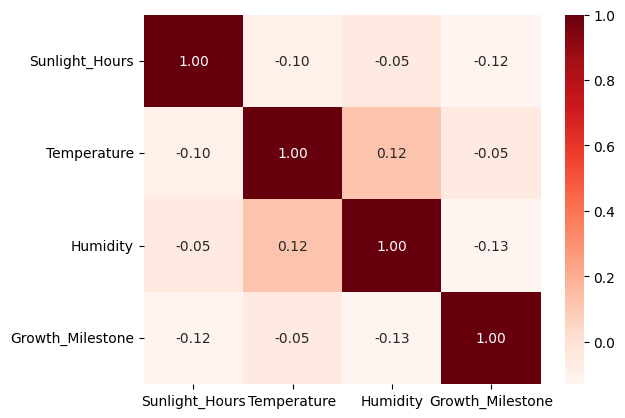

In [109]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4. Modeling**

## **ML**

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [111]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [112]:
x= df.drop(['Growth_Milestone'],axis=1)
y= df['Growth_Milestone']

In [113]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [115]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
svc = SVC(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, svc, abc, gbc, lgr, xgb]

names = ["Random Forest", "Support Vector Machine", "Ada Boost",
        "Gradient Boostng", "Logistic Regression", "XGBoost"]

Random Forest accuracy: 0.5897
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        17
           1       0.64      0.64      0.64        22

    accuracy                           0.59        39
   macro avg       0.58      0.58      0.58        39
weighted avg       0.59      0.59      0.59        39



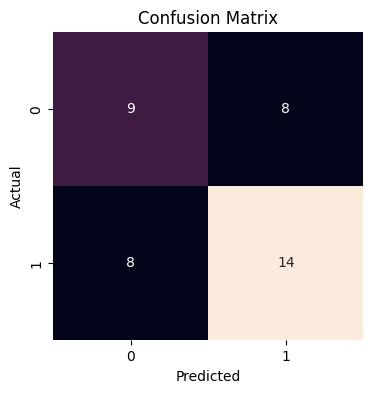

--------------------------------------------------
Support Vector Machine accuracy: 0.4872
              precision    recall  f1-score   support

           0       0.43      0.53      0.47        17
           1       0.56      0.45      0.50        22

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.49        39
weighted avg       0.50      0.49      0.49        39



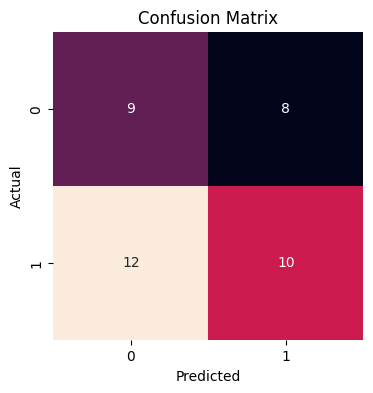

--------------------------------------------------
Ada Boost accuracy: 0.6154
              precision    recall  f1-score   support

           0       0.55      0.71      0.62        17
           1       0.71      0.55      0.62        22

    accuracy                           0.62        39
   macro avg       0.63      0.63      0.62        39
weighted avg       0.64      0.62      0.62        39



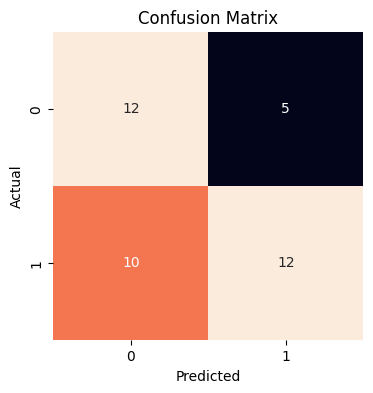

--------------------------------------------------
Gradient Boostng accuracy: 0.4872
              precision    recall  f1-score   support

           0       0.41      0.41      0.41        17
           1       0.55      0.55      0.55        22

    accuracy                           0.49        39
   macro avg       0.48      0.48      0.48        39
weighted avg       0.49      0.49      0.49        39



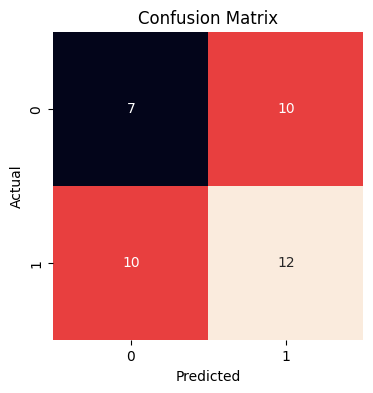

--------------------------------------------------
Logistic Regression accuracy: 0.4872
              precision    recall  f1-score   support

           0       0.44      0.65      0.52        17
           1       0.57      0.36      0.44        22

    accuracy                           0.49        39
   macro avg       0.51      0.51      0.48        39
weighted avg       0.51      0.49      0.48        39



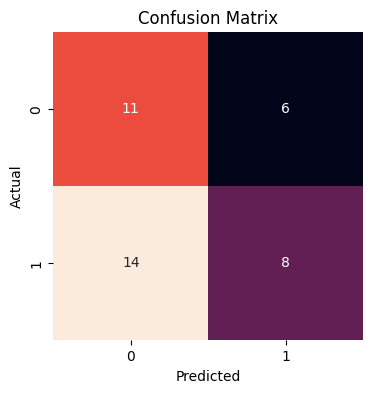

--------------------------------------------------
XGBoost accuracy: 0.4615
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        17
           1       0.52      0.50      0.51        22

    accuracy                           0.46        39
   macro avg       0.46      0.46      0.46        39
weighted avg       0.46      0.46      0.46        39



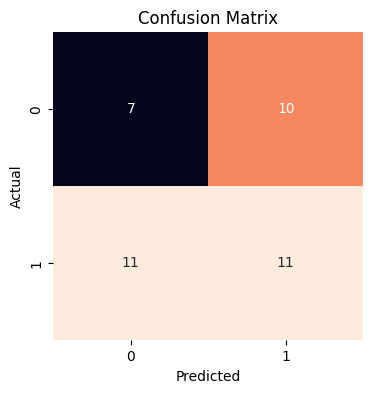

--------------------------------------------------


In [116]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(classification_report(y_test, pred))
 
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    
    index += 1

In [117]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
acc_df

,Model,Accuracy
0,Random Forest,58.974359
1,Support Vector Machine,48.717949
2,Ada Boost,61.538462
3,Gradient Boostng,48.717949
4,Logistic Regression,48.717949
5,XGBoost,46.153846


In [118]:
px.bar(acc_df , x= 'Accuracy', y='Model', text_auto = True,  title = 'Model Accuracy', orientation='h', template='plotly_dark')

## **Neural NetWork TF**

In [119]:
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow import keras
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [120]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_labels = train_dataset.pop('Growth_Milestone')
test_labels = test_dataset.pop('Growth_Milestone')

In [128]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation ='relu', kernel_regularizer=regularizers.l2(0.001),),      
    layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.001),),
    layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(0.001),),   
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])
    return model

In [129]:
model = build_model()
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [130]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split=0.2)
history

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.4885 - binary_crossentropy: 0.6945 - loss: 0.8123 - val_accuracy: 0.4839 - val_binary_crossentropy: 0.7040 - val_loss: 0.8201
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5771 - binary_crossentropy: 0.6616 - loss: 0.7775 - val_accuracy: 0.5484 - val_binary_crossentropy: 0.7062 - val_loss: 0.8210
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5963 - binary_crossentropy: 0.6452 - loss: 0.7594 - val_accuracy: 0.5161 - val_binary_crossentropy: 0.7091 - val_loss: 0.8228
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6103 - binary_crossentropy: 0.6355 - loss: 0.7491 - val_accuracy: 0.5484 - val_binary_crossentropy: 0.7127 - val_loss: 0.8255
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6555 - binary_crossentropy: 0.6200 - loss: 0.7331 - val_accuracy: 0.5484 - val_binary_crossentropy: 0.7178 - val_loss: 0.8298
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accu

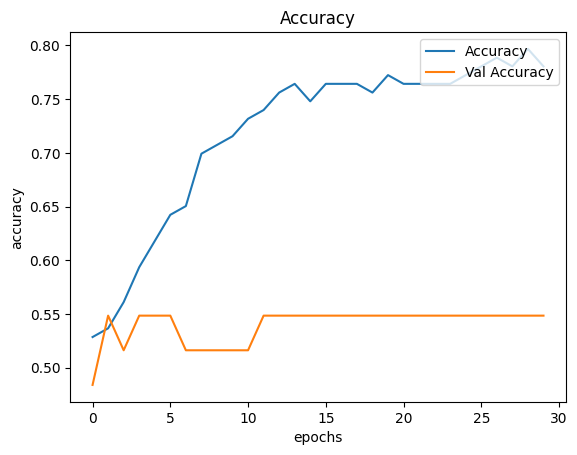

In [131]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

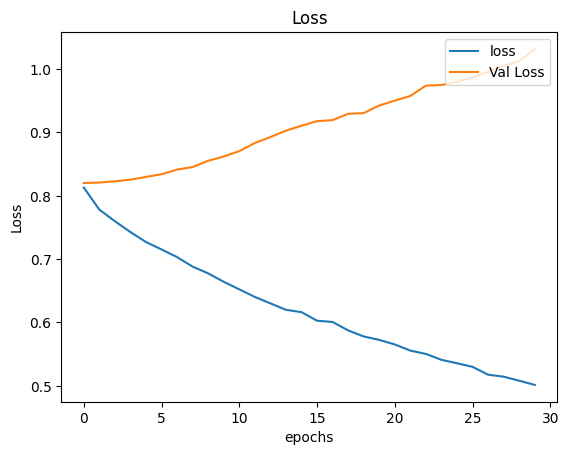

In [132]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [133]:
model.evaluate(X_test,y_test,verbose=2)

2/2 - 0s - 14ms/step - accuracy: 0.4872 - binary_crossentropy: 0.5844 - loss: 0.8765


[0.8764641880989075, 0.5843815803527832, 0.4871794879436493]

**Thankyou. Please leave your advice in the comments**